<a href="https://colab.research.google.com/github/Gabrieldiasdeoliveira/6sigma/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_6sigma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto estatistico para redução de custos e melhorias de processos, atráves da metódologia 6 sigma com DMAIC para dados financeiros da empresa.

##Etapas do Projeto

**Definir:** *Nessa fase, o problema a ser resolvido é claramente definido,
incluindo os objetivos e metas a serem alcançados;*

**Medir:** *Nessa fase, são coletados dados sobre o processo existente para entender como ele funciona atualmente;*

**Analisar:** *Nessa fase, os dados coletados são analisados para identificar as principais causas do problema e as oportunidades de melhoria;*

**Melhorar:** *Nessa fase, soluções são desenvolvidas e implementadas para corrigir as causas identificadas e melhorar o processo;*

**Controlar:** *Nessa fase, medidas são implementadas para garantir que o processo permaneça em um estado de melhoria contínua e que os objetivos e metas estabelecidos sejam alcançados e mantidos.*

**Definir:** *Uma empresa de tecnologia está em busca de melhorias nos seus processos financeiros. Foram disponibilizados os dados financeiros da empresa para análise estatística e, a partir disso, serão aplicadas algumas metodologias estatísticas para tomada de decisão. Eles observaram que existe um problema entre o valor de orçamento previsto e os custos de determinadas atividades. Muitas vezes, os custos ficavam acima do planejado, mas isso só era observado quando se fazia um fechamento geral das contas anualmente, gerando muito impacto na saúde financeira da companhia. O problema foi então passado para o time de estatísticos da empresa, cujo objetivo é melhorar ou criar processos da área para prevenir a perdas.
Então foi definido pelo time de especialista que além das tecnicas estatiticas para analise de dados, utilizaremos a metodologia DMAIC e 6 sigma.*


**Medir:** *Coleta e Geração de dados*

In [1]:
#Gerando dados aleatórios de Custo e Orçamento
custo_funcionario <- rnorm(13, mean = 70000, sd = 3500)
custo_infraestrutura <- rnorm(13, mean = 10000, sd = 2000)
custo_tecnologia <- rnorm(13, mean = 30000, sd = 1500)
custo_marketing <- rnorm(13, mean = 15000, sd = 750)
custo_variavel <- rnorm(13, mean = 10000, sd = 500)
orcamento_funcionario <- rnorm(13, mean = 50000, sd = 2500)
orcamento_infraestrutura <- rnorm(13, mean = 8000, sd = 400)
orcameno_tecnologia <- rnorm(13, mean = 25000, sd = 1250)
orcamento_marketing <- rnorm(13, mean = 8000, sd = 400)
orcamento_variavel <- rnorm(13, mean = 6000, sd = 300)

In [2]:
#Período
meses <- seq(as.Date("2022/03/02"), as.Date("2023/03/03"), by = "month")
meses <- format(meses, "%m-%y")

In [3]:
# Criação e visualização da base de dados
dados <- data.frame(
  Custo_com_funcionario = custo_funcionario,
  Custo_de_infraestrutura = custo_infraestrutura,
  Custo_de_tecnologia = custo_tecnologia,
  Custo_de_marketing = custo_marketing,
  Custos_variaveis = custo_variavel,
  Orcamento_funcionario = orcamento_funcionario,
  Orcamento_infraestrutura = orcamento_infraestrutura,
  Orcameno_tecnologia = orcameno_tecnologia,
  Orcamento_marketing = orcamento_marketing,
  Orcamento_variavel = orcamento_variavel,
  Mes = meses
)
head(dados)
dim(dados)

,Custo_com_funcionario,Custo_de_infraestrutura,Custo_de_tecnologia,Custo_de_marketing,Custos_variaveis,Orcamento_funcionario,Orcamento_infraestrutura,Orcameno_tecnologia,Orcamento_marketing,Orcamento_variavel,Mes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,70227.49,8945.690,29964.80,14982.73,10134.136,47378.68,7972.949,27853.24,8053.833,6259.935,03-22
2,71805.60,9470.758,27647.68,15748.07,10332.109,52330.65,8550.893,25535.99,8331.168,6083.958,04-22
3,71022.31,10242.408,29602.37,14042.41,10842.408,51278.44,7879.118,22846.78,8376.028,5288.420,05-22
4,69589.81,9616.733,31240.91,15190.08,9564.296,48611.38,8107.801,26247.77,8223.534,6169.048,06-22
5,74898.69,11091.559,29806.35,16681.62,9685.674,51028.18,7789.054,24947.06,8465.824,6396.341,07-22
6,74603.77,13183.083,32024.07,14379.45,9477.134,52844.85,7883.762,26785.86,8641.378,5448.338,08-22


[1] 13 11

In [4]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
# Adição de duas novas colunas com a soma do Orçamento e do Custo
dados <- dados %>%
  mutate(Custo_total = rowSums(select(., starts_with("Custo"))),
         Orcamento_total = rowSums(select(., starts_with("Orcamento"))))

head(dados)


,Custo_com_funcionario,Custo_de_infraestrutura,Custo_de_tecnologia,Custo_de_marketing,Custos_variaveis,Orcamento_funcionario,Orcamento_infraestrutura,Orcameno_tecnologia,Orcamento_marketing,Orcamento_variavel,Mes,Custo_total,Orcamento_total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,70227.49,8945.690,29964.80,14982.73,10134.136,47378.68,7972.949,27853.24,8053.833,6259.935,03-22,134254.8,69665.39
2,71805.60,9470.758,27647.68,15748.07,10332.109,52330.65,8550.893,25535.99,8331.168,6083.958,04-22,135004.2,75296.67
3,71022.31,10242.408,29602.37,14042.41,10842.408,51278.44,7879.118,22846.78,8376.028,5288.420,05-22,135751.9,72822.01
4,69589.81,9616.733,31240.91,15190.08,9564.296,48611.38,8107.801,26247.77,8223.534,6169.048,06-22,135201.8,71111.76
5,74898.69,11091.559,29806.35,16681.62,9685.674,51028.18,7789.054,24947.06,8465.824,6396.341,07-22,142163.9,73679.40
6,74603.77,13183.083,32024.07,14379.45,9477.134,52844.85,7883.762,26785.86,8641.378,5448.338,08-22,143667.5,74818.33


**Analisar:** *Nessa fase, os dados coletados são analisados para identificar as principais causas do problema e as oportunidades de melhoria;*


In [6]:
mean(dados$Orcamento_total)

[1] 72511.92

*Foram escolhidas as variaveis Custo e Orçamento total, apenas para fim de estudo.*

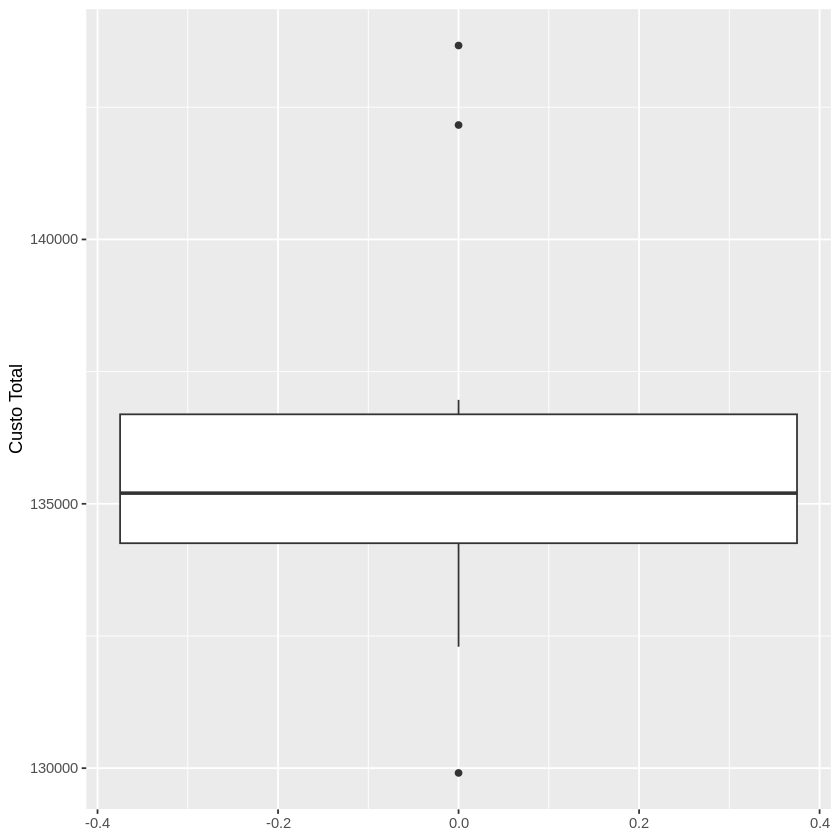

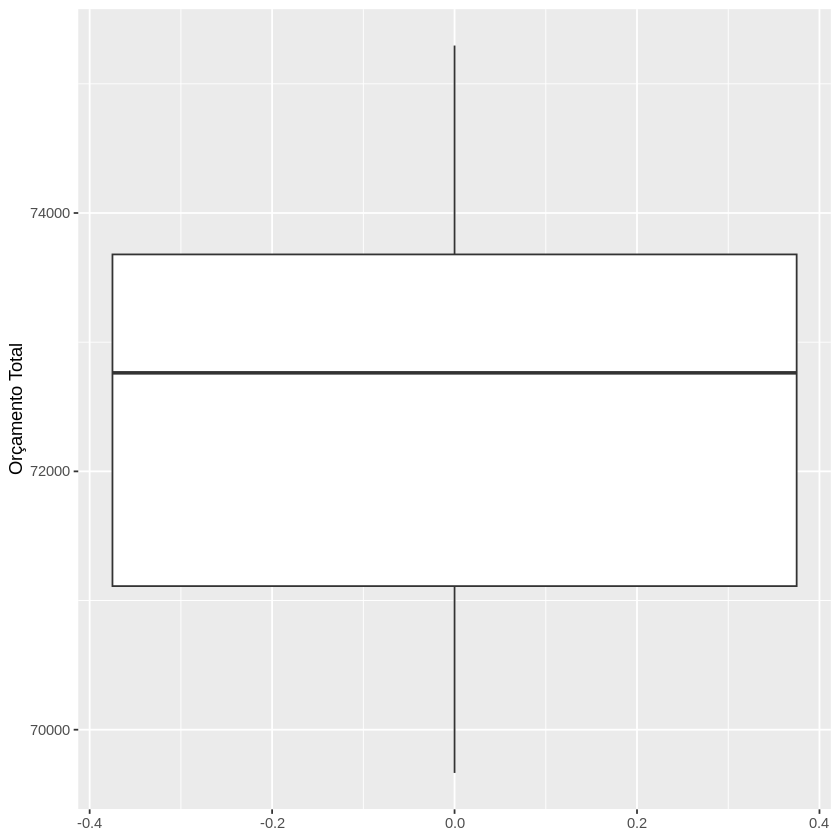

In [7]:
library(ggplot2)

# Boxplot para Custos_total
ggplot(dados, aes(y = Custo_total)) +
  geom_boxplot() +
  labs(y = "Custo Total")

# Boxplot para Orcamento_total
ggplot(dados, aes(y = Orcamento_total)) +
  geom_boxplot() +
  labs(y = "Orçamento Total")

In [9]:
attach(dados)

In [10]:
summary(Custo_total)
summary(Orcamento_total)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 129910  134255  135202  135882  136692  143668 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  69665   71112   72763   72512   73679   75297 

In [11]:
# Média e desvio padrão das variáveis
mean_custos <- apply(dados[, 1:5], 2, mean)
sd_custos <- apply(dados[, 1:5], 2, sd)
mean_orcamentos <- apply(dados[, 6:10], 2, mean)
sd_orcamentos <- apply(dados[, 6:10], 2, sd)

# Valores ideais de orçamento e custo
ideal_custos <- c(70000, 10000, 30000, 15000, 10000)
ideal_orcamentos <- c(50000, 8000, 25000, 8000, 6000)

# Comparação com os valores ideais
comp_custos <- round((mean_custos - ideal_custos)/ideal_custos * 100, 2)
comp_orcamentos <- round((mean_orcamentos - ideal_orcamentos)/ideal_orcamentos * 100, 2)

# Criar a tabela
tabela <- data.frame(Variável = c("Custo 1", "Custo 2", "Custo 3", "Custo 4",
"Custo 5", "Orçamento 1", "Orçamento 2", "Orçamento 3", "Orçamento 4", "Orçamento 5"),
                     Média = c(mean_custos, mean_orcamentos),
                     "Desvio Padrão" = c(sd_custos, sd_orcamentos),
                     "Valor Ideal" = c(ideal_custos, ideal_orcamentos),
                     "% de diferença" = c(comp_custos, comp_orcamentos))

# Exibir a tabela
print(tabela)


#A diferença apresentada na tabela "% de diferença" é o resultado da comparação
# entre a média dos valores observados para cada variável (Custos e Orçamento)
# com o valor ideal estabelecido para cada uma delas.

                            Variável     Média Desvio.Padrão Valor.Ideal
Custo_com_funcionario        Custo 1 69953.019     3072.8117       70000
Custo_de_infraestrutura      Custo 2 10439.077     1258.3949       10000
Custo_de_tecnologia          Custo 3 30396.215     1415.6776       30000
Custo_de_marketing           Custo 4 15232.290      843.2119       15000
Custos_variaveis             Custo 5  9861.160      471.3585       10000
Orcamento_funcionario    Orçamento 1 50639.925     1693.6682       50000
Orcamento_infraestrutura Orçamento 2  8021.067      326.8885        8000
Orcameno_tecnologia      Orçamento 3 25003.683     1775.4391       25000
Orcamento_marketing      Orçamento 4  8016.799      454.3832        8000
Orcamento_variavel       Orçamento 5  5834.131      424.8788        6000
                         X..de.diferença
Custo_com_funcionario              -0.07
Custo_de_infraestrutura             4.39
Custo_de_tecnologia                 1.32
Custo_de_marketing               

**Etapa 3 -** *Realizar uma análise de dados: Utilizar as informações geradas para realizar uma análise de dados exploratória e identificar as tendências, distribuições e padrões dos dados.*

In [12]:
install.packages("zoo")
library(zoo)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [13]:
media_3_meses <- rollapplyr(dados$Custo_total, 3, mean, fill = NA)

In [14]:
limite_controle <- media_3_meses[length(media_3_meses)] + 1.7*sd(tail(Custo_total, 3))


*Fiz um teste utilizando 1.5 desvios apenas para teste*

In [15]:
# gerar dados aleatórios para custo_total
set.seed(123) # definir semente para reproduzir resultados
Custo_total <- rnorm(12, mean = 10000, sd = 500)

# calcular média dos últimos 3 meses
media_3_meses <- mean(tail(Custo_total, 3))

# definir limite de controle com base no 6 sigma
limite_controle <- media_3_meses + 1.5*sd(tail(Custo_total, 3))

# gerar novo valor aleatório para custo_variavel
novo_valor <- rnorm(1, mean = 12000, sd = 1000)

# verificar se novo valor está acima do limite de controle
if (novo_valor > limite_controle) {
  mensagem <- paste("Novo valor", novo_valor, "está acima do limite de controle", limite_controle)
  print(mensagem)
} else {
  print("Novo valor dentro do limite de controle")
}



[1] "Novo valor 12400.7714505941 está acima do limite de controle 10815.9888891453"


In [16]:
# gerar dados aleatórios para custo_variavel
set.seed(123) # definir semente para reproduzir resultados
custo_variavel <- rnorm(12, mean = 10000, sd = 500)

# calcular média móvel dos últimos 3 meses
media_3_meses <- rollmean(custo_variavel, 3, fill = NA, align = "right")

# definir limite de controle com base no 6 sigma
limite_controle <- media_3_meses[length(media_3_meses)] + 4.5*sd(tail(custo_variavel, 3))

# gerar novo valor aleatório para custo_variavel
novo_valor <- rnorm(1, mean = 12000, sd = 1000)

# adicionar novo valor à variável custo_variavel
custo_variavel <- c(custo_variavel, novo_valor)

# recalcular média móvel dos últimos 3 meses com novo valor
media_3_meses <- rollmean(custo_variavel, 3, fill = NA, align = "right")

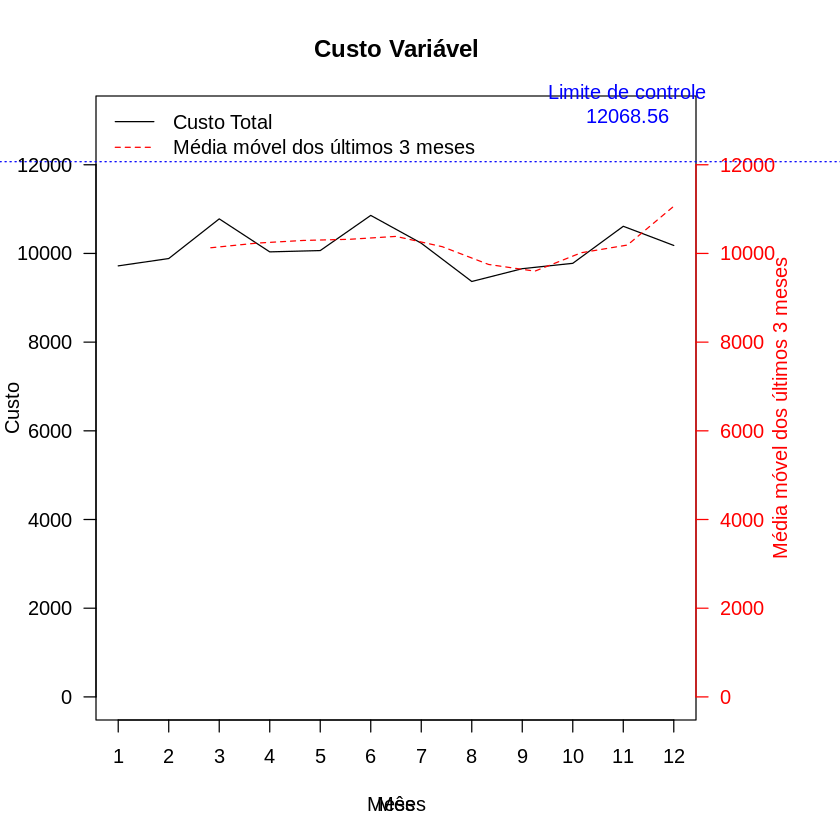

In [17]:
# gerar gráfico
par(mar = c(5, 4, 4, 6), xpd = TRUE)
plot(Custo_total, type = "l", lty = 1, col = "black", ylim = c(0, max(Custo_total)*1.2),
     main = "Custo Variável", xlab = "Meses", ylab = "Custo",
     xaxt = "n", las = 1)
axis(side = 1, at = 1:length(Custo_total), labels = 1:length(Custo_total))
mtext(side = 1, text = "Mês", line = 3)
par(new = TRUE)
plot(media_3_meses, type = "l", lty = 2, col = "red", ylim = c(0, max(Custo_total)*1.2),
     axes = FALSE, xlab = "", ylab = "")
axis(side = 4, ylim = c(0, max(Custo_total)*1.2), col = "red", col.axis = "red", las = 1)
mtext(side = 4, text = "Média móvel dos últimos 3 meses", line = 3, col = "red")
legend("topleft", legend = c("Custo Total", "Média móvel dos últimos 3 meses"),
       col = c("black", "red"), lty = c(1, 2), bty = "n")
abline(h = limite_controle, lty = 3, col = "blue")
text(length(Custo_total), limite_controle*1.05, paste0("Limite de controle\n", round(limite_controle, 2)), pos = 3, col = "blue")


# Utilizando os dados reais da simulação.

**Melhorar:** *Nessa fase, soluções são desenvolvidas e implementadas para corrigir as causas identificadas e melhorar o processo;*
*Uma melhor forma de observar os dados é olhar em formato de tabela e coneguir identificar onde os valore deram fora, isso pode ser feito também no Excel.*

In [18]:
media <- mean(dados$Custo_total)
desvio_padrao <- sd(dados$Custo_total)

limite_superior <- media + 4 * desvio_padrao
limite_inferior <- media - 4 * desvio_padrao

dados$fora_6sigma <- ifelse(dados$Custo_total > limite_superior | dados$Custo_total < limite_inferior, "Fora", "Dentro")

**Controlar:** *Nessa fase, medidas são implementadas para garantir que o processo permaneça em um estado de melhoria contínua e que os objetivos e metas estabelecidos sejam alcançados e mantidos.*

In [19]:
# selecionar uma amostra aleatória de linhas do data frame
amostra <- dados[sample(nrow(dados), 10), ]

# gerar a tabela com o mês, o valor e a informação se está dentro ou fora dos limites
tabela <- data.frame(Mes = amostra$Mes, Custo_total = amostra$Custo_total, Fora_6sigma = amostra$fora_6sigma)
tabela

Mes,Custo_total,Fora_6sigma
<chr>,<dbl>,<chr>
10-22,136025.9,Dentro
12-22,136966.0,Dentro
09-22,132297.5,Dentro
02-23,136692.3,Dentro
11-22,129910.0,Dentro
08-22,143667.5,Dentro
05-22,135751.9,Dentro
06-22,135201.8,Dentro
03-22,134254.8,Dentro


In [20]:
# selecionar uma amostra aleatória de linhas do data frame
amostra <- dados[sample(nrow(dados), 10), ]

# calcular limites de 6 sigma
media <- mean(dados$Custo_total)
desvio_padrao <- sd(dados$Custo_total)
limite_superior <- media + 1.7 * desvio_padrao
limite_inferior <- media - 1.7 * desvio_padrao

# criar novas colunas indicando se cada valor está dentro ou fora dos limites de 6 sigma
amostra$fora_6sigma <- ifelse(amostra$Custo_total > limite_superior | amostra$Custo_total < limite_inferior, "Fora", "Dentro")
amostra$acima_limite_superior <- ifelse(amostra$Custo_total > limite_superior, "Sim", "Não")
amostra$abaixo_limite_inferior <- ifelse(amostra$Custo_total < limite_inferior, "Sim", "Não")

# gerar a tabela com o mês, o valor e as informações de limites
tabela <- data.frame(Mes = amostra$Mes, Custo_total = amostra$Custo_total, Fora_6sigma = amostra$fora_6sigma, Acima_Limite_Superior = amostra$acima_limite_superior, Abaixo_Limite_Inferior = amostra$abaixo_limite_inferior)
tabela

Mes,Custo_total,Fora_6sigma,Acima_Limite_Superior,Abaixo_Limite_Inferior
<chr>,<dbl>,<chr>,<chr>,<chr>
09-22,132297.5,Dentro,Não,Não
07-22,142163.9,Fora,Sim,Não
12-22,136966.0,Dentro,Não,Não
03-23,134840.9,Dentro,Não,Não
11-22,129910.0,Dentro,Não,Não
03-22,134254.8,Dentro,Não,Não
04-22,135004.2,Dentro,Não,Não
05-22,135751.9,Dentro,Não,Não
06-22,135201.8,Dentro,Não,Não


In [21]:
media <- mean(dados$Custo_total,10 )
desvio_padrao <- sd(dados$Custo_total)
limite_superior_6sigma <- media + 1.7 * desvio_padrao


In [22]:
orçamento_total <- 71194 # Coloquei a média do orçamento total
dados$Acima_Orcamento <- ifelse(dados$Custo_total > orçamento_total, "Sim", "Não")


In [23]:
dados_filtrados <- subset(dados, Custo_total > orçamento_total & Custo_total > limite_superior_6sigma)


In [24]:
tabela1 <- data.frame(Mes = dados_filtrados$Mes,
                      Custo_total = dados_filtrados$Custo_total,
                      Acima_Limite_Superior_6sigma = ifelse(dados_filtrados$Custo_total > limite_superior_6sigma, "Sim", "Não"),
                      Acima_Orcamento_Total = ifelse(dados_filtrados$Custo_total > orçamento_total, "Sim", "Não"))
tabela1


Mes,Custo_total,Acima_Limite_Superior_6sigma,Acima_Orcamento_Total
<chr>,<dbl>,<chr>,<chr>
07-22,142163.9,Sim,Sim
08-22,143667.5,Sim,Sim
